In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np


In [ ]:
# Data Preprocessing

df = pd.read_csv("D:/Projects/hltb_dataset_filtered.csv")
df.info()

# Ensure valid release years
df = df[pd.notnull(df['release_year'])]
df['release_year'] = df['release_year'].astype(int)

# Keep only rows with at least one playtime value
df_filtered = df[
    df['main_story'].notnull() |
    df['main_plus_sides'].notnull() |
    df['completionist'].notnull()
]

# Only consider years with >= 10 games
counts = df_filtered.groupby('release_year').size()
valid_years = counts[counts >= 10].index
df_valid = df_filtered[df_filtered['release_year'].isin(valid_years)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51777 entries, 0 to 51776
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      51777 non-null  int64  
 1   name                    51777 non-null  object 
 2   type                    51777 non-null  object 
 3   platform                50985 non-null  object 
 4   genres                  47002 non-null  object 
 5   developer               45843 non-null  object 
 6   publisher               44171 non-null  object 
 7   release_date            50162 non-null  object 
 8   release_precision       50162 non-null  object 
 9   release_year            50162 non-null  float64
 10  release_month           46523 non-null  float64
 11  release_day             45018 non-null  float64
 12  main_story_polled       42023 non-null  float64
 13  main_story              42027 non-null  float64
 14  main_plus_sides_polled  28416 non-null

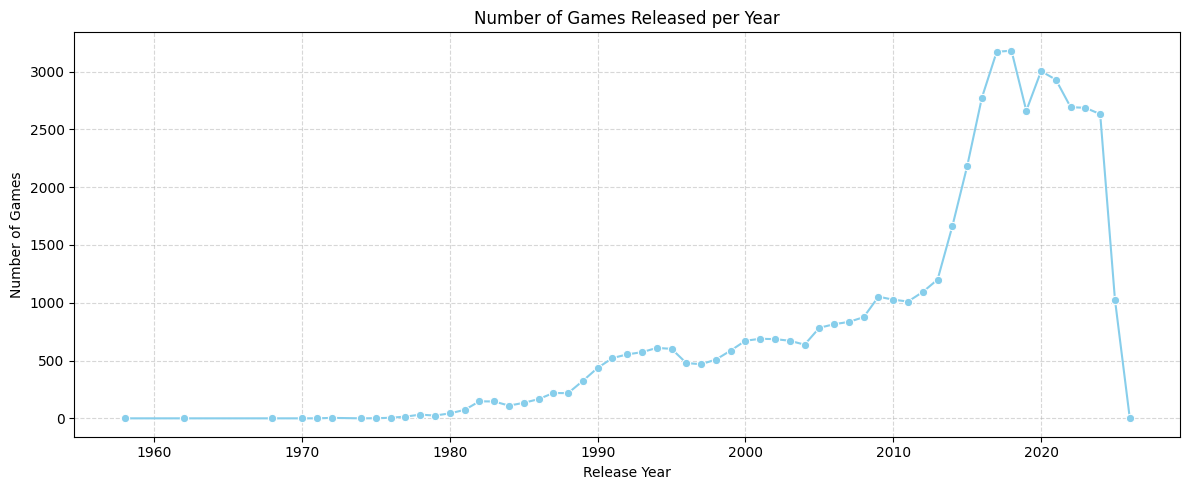

In [ ]:
# Number of Games Released per Year
yearly_counts = df_filtered.groupby('release_year').size()

plt.figure(figsize=(12, 5))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', color='skyblue')
plt.title('Number of Games Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Games')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

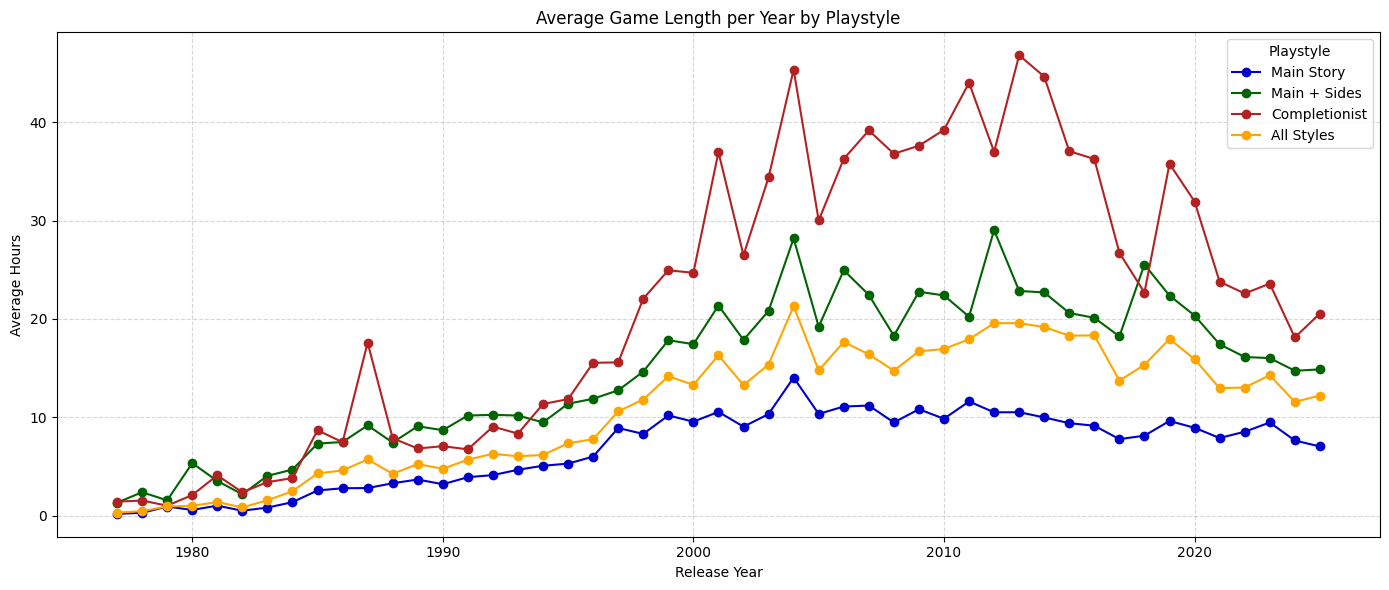

In [ ]:
# Average Game Length by Playstyle

grouped = df_valid.groupby('release_year')
main_story = grouped['main_story'].mean()
main_plus = grouped['main_plus_sides'].mean()
completionist = grouped['completionist'].mean()
all_styles = grouped['all_styles'].mean()

plt.figure(figsize=(14, 6))
plt.plot(main_story.index, main_story.values, marker='o', label='Main Story', color='mediumblue')
plt.plot(main_plus.index, main_plus.values, marker='o', label='Main + Sides', color='darkgreen')
plt.plot(completionist.index, completionist.values, marker='o', label='Completionist', color='firebrick')
plt.plot(all_styles.index, all_styles.values, marker='o', label='All Styles', color='orange')

plt.title('Average Game Length per Year by Playstyle')
plt.xlabel('Release Year')
plt.ylabel('Average Hours')
plt.legend(title="Playstyle")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

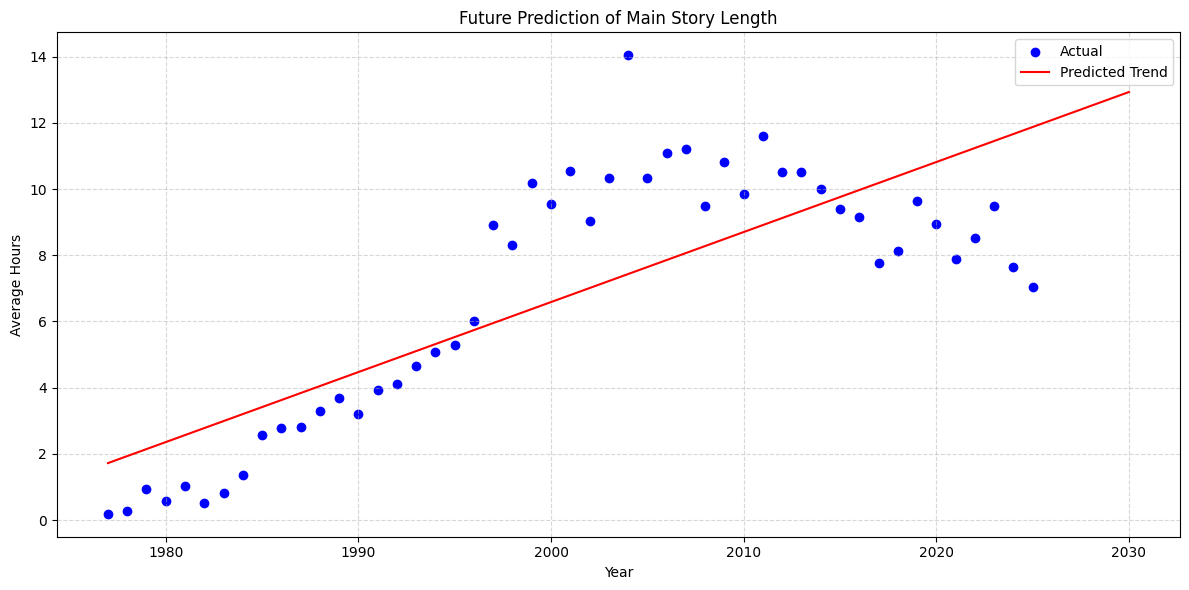

In [ ]:

# Future Prediction (Linear Regression on Main Story)

years = main_story.index.values.reshape(-1, 1)
hours = main_story.values.reshape(-1, 1)

model = LinearRegression()
model.fit(years, hours)

future_years = np.arange(main_story.index.min(), main_story.index.max() + 6).reshape(-1, 1)  # 5 years ahead
future_pred = model.predict(future_years)

plt.figure(figsize=(12, 6))
plt.scatter(years, hours, color='blue', label='Actual')
plt.plot(future_years, future_pred, color='red', label='Predicted Trend')
plt.title('Future Prediction of Main Story Length')
plt.xlabel('Year')
plt.ylabel('Average Hours')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Longest Game Debug:
name                    Cadria: Item Shop
platform                               PC
publisher       Best Kirin Global Limited
release_year                         2018
all_styles                        8105.08
Name: 27512, dtype: object


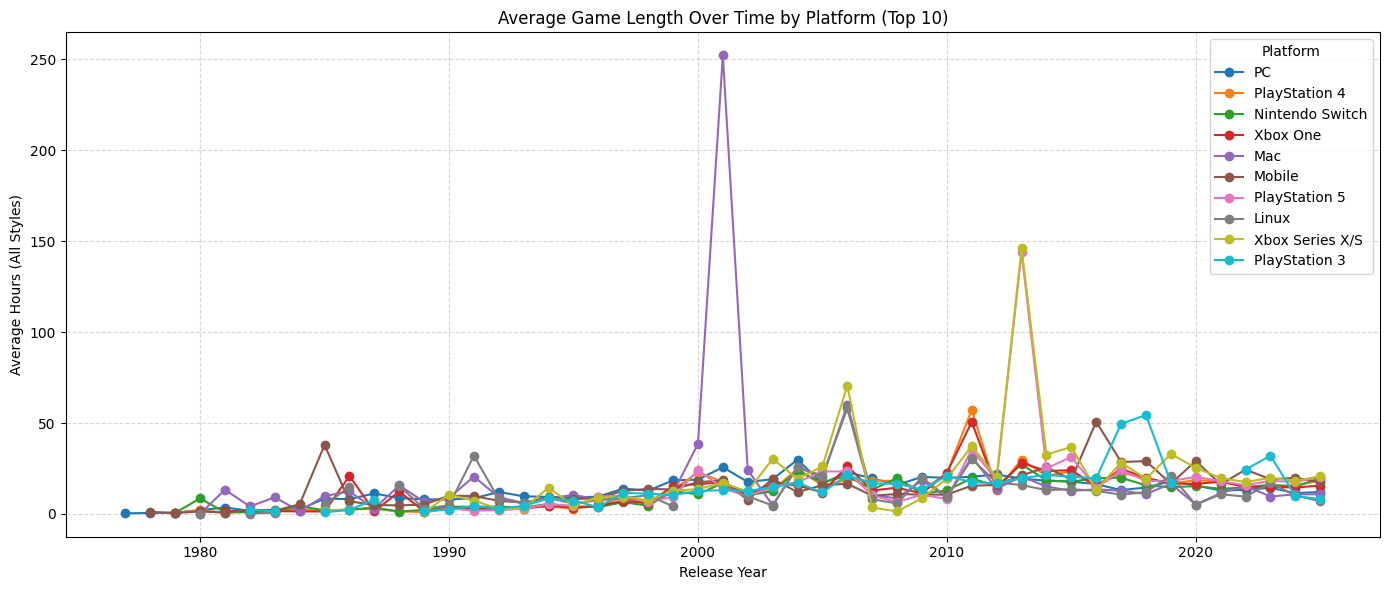

In [ ]:

# Platform Analysis

df_valid = df_valid.dropna(subset=['platform'])
df_valid = df_valid.assign(platform=df_valid['platform'].str.split(', '))
df_valid = df_valid.explode('platform')

# Longest game debug
longest_game = df_valid.loc[df_valid['all_styles'].idxmax()]
print("Longest Game Debug:")
print(longest_game[['name','platform','publisher','release_year','all_styles']])

# Comparison of consoles (Top 10 platforms)
top_platforms_10 = df_valid['platform'].value_counts().head(10).index
platform_trends_10 = df_valid[df_valid['platform'].isin(top_platforms_10)] \
    .groupby(['release_year','platform'])['all_styles'].mean().unstack()

plt.figure(figsize=(14, 6))
for platform in top_platforms_10:
    plt.plot(platform_trends_10.index, platform_trends_10[platform], marker='o', label=platform)

plt.title('Average Game Length Over Time by Platform (Top 10)')
plt.xlabel('Release Year')
plt.ylabel('Average Hours (All Styles)')
plt.legend(title="Platform")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\aaziz\AppData\Local\Temp\ipykernel_20940\3778839779.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_avg.index, y=publisher_avg.values, palette="magma")


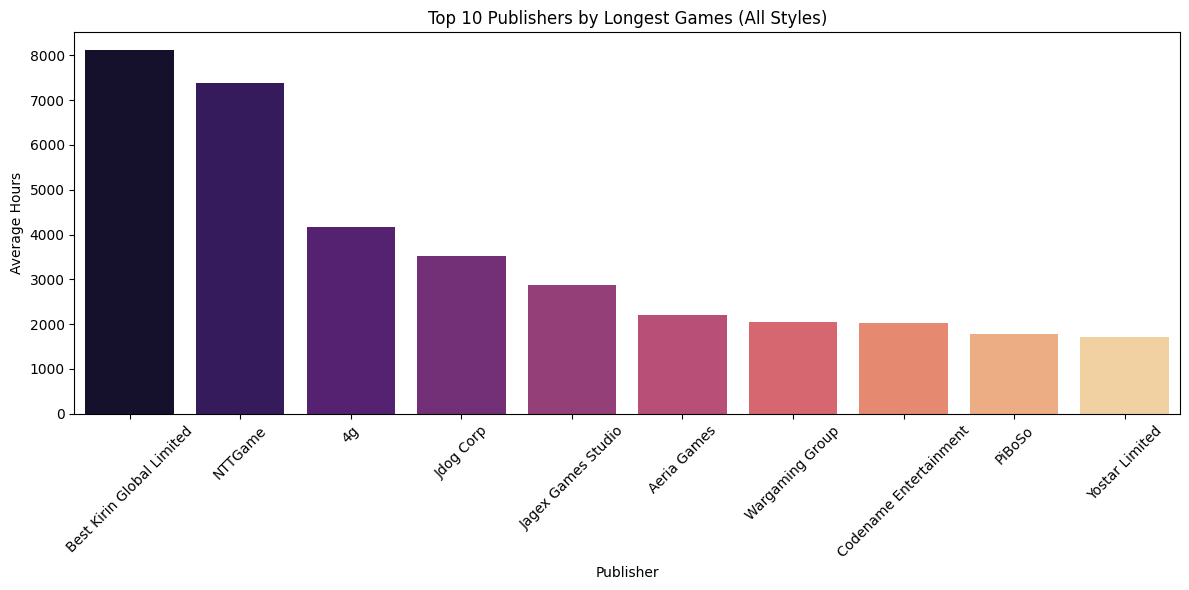

In [7]:
# Publisher Analysis
publisher_avg = df_valid.groupby('publisher')['all_styles'].mean().dropna().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=publisher_avg.index, y=publisher_avg.values, palette="magma")
plt.title('Top 10 Publishers by Longest Games (All Styles)')
plt.xlabel('Publisher')
plt.ylabel('Average Hours')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



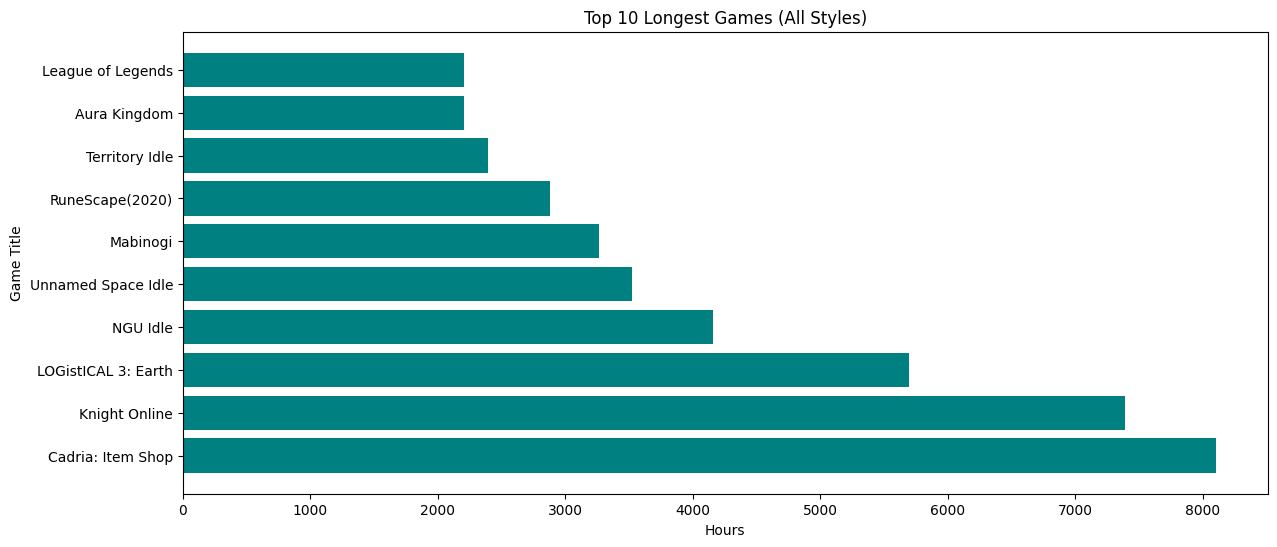

In [8]:
# Longest Games
longest_games = df_filtered.nlargest(10, 'all_styles')[['name', 'all_styles']]
plt.figure(figsize=(14, 6))
bars = plt.barh(longest_games['name'], longest_games['all_styles'], color='teal')
plt.title('Top 10 Longest Games (All Styles)')
plt.xlabel('Hours')
plt.ylabel('Game Title')

plt.show()

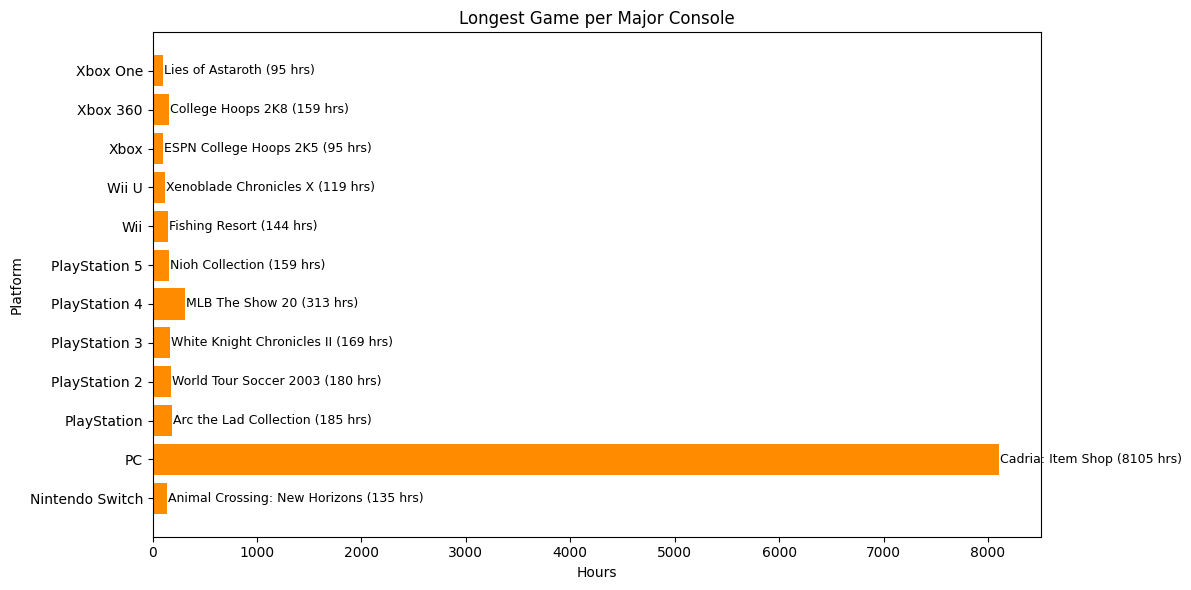

In [10]:
# Define major platforms manually
major_platforms = ["PC", "PlayStation", "PlayStation 2", "PlayStation 3", "PlayStation 4", 
                   "PlayStation 5", "Xbox", "Xbox 360", "Xbox One", "Xbox Series X/S", 
                   "Nintendo Switch", "Wii", "Wii U", "GameCube", "3DS", "DS"]

longest_per_platform = df_filtered[df_filtered['platform'].isin(major_platforms)]
longest_per_platform = longest_per_platform.loc[longest_per_platform.groupby('platform')['all_styles'].idxmax()]

plt.figure(figsize=(12, 6))
plt.barh(longest_per_platform['platform'], longest_per_platform['all_styles'], color='darkorange')

plt.title('Longest Game per Major Console')
plt.xlabel('Hours')
plt.ylabel('Platform')

for i, (platform, hours, title) in enumerate(zip(
    longest_per_platform['platform'],
    longest_per_platform['all_styles'],
    longest_per_platform['name']
)):
    plt.text(hours + 10, i, f"{title} ({int(hours)} hrs)", va='center', fontsize=9)

plt.tight_layout()
plt.show()

